## Importing Libraries and read the dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_excel("C:/Users/Admin/Downloads/Assignment_Raw data Excel File.xlsx")

## Understanding Data

### Checking few samples

In [46]:
df.head()

,Lead ID,Lead creation date,Webinar Attendance Status,Webinar_Duration (Mins),Live Session Status (Yes/No),Registration Date time,Qualification DateTime,Lead Stage,Channel,Rechurned DateTime,...,call_status,Pre-Sales Team First call,Pre-Sales Team last call,Pre-Sales Team total attempts,Pre-Sales Team successful attempts,Sales-Team First call,Sales-Team last call,Sales- Team Total Attempts,Sales-Team successful attempts,Total Duration of the call (in seconds)
0,1,"Jun 8, 2024, 12:24:28â€¯PM",Yes,30.0,Yes,NaN,"Jun 8, 2024, 12:00:00â€¯AM",Contact Again,Offline Workshops,NaN,...,NaN,NaN,NaN,NaN,NaN,"Jun 9, 2024, 4:57:53â€¯PM","Jun 9, 2024, 4:57:53â€¯PM",1.0,0.0,NaN
1,2,"Jun 8, 2024, 12:24:28â€¯PM",Yes,31.0,Yes,NaN,"Jun 8, 2024, 12:00:00â€¯AM",Contact Again,Offline Workshops,NaN,...,NaN,NaN,NaN,NaN,NaN,"Jun 9, 2024, 4:46:21â€¯PM","Jun 9, 2024, 4:46:21â€¯PM",1.0,0.0,NaN
2,3,"Jun 8, 2024, 12:24:27â€¯PM",Yes,32.0,Yes,NaN,"Jun 8, 2024, 12:00:00â€¯AM",Contact Again,Offline Workshops,NaN,...,NaN,NaN,NaN,NaN,NaN,"Jun 9, 2024, 4:58:39â€¯PM","Jun 9, 2024, 6:35:52â€¯PM",2.0,0.0,NaN
3,4,"Jun 8, 2024, 12:24:26â€¯PM",Yes,33.0,Yes,NaN,"Jun 8, 2024, 12:00:00â€¯AM",Contact Again,Offline Workshops,NaN,...,NaN,NaN,NaN,NaN,NaN,"Jun 9, 2024, 4:59:57â€¯PM","Jun 9, 2024, 6:36:11â€¯PM",3.0,0.0,NaN
4,5,"Jun 8, 2024, 12:24:25â€¯PM",Yes,34.0,Yes,NaN,"Jun 8, 2024, 12:00:00â€¯AM",Contact Again,Offline Workshops,NaN,...,NaN,NaN,NaN,NaN,NaN,"Jun 9, 2024, 4:41:48â€¯PM","Jun 9, 2024, 4:41:48â€¯PM",1.0,0.0,97.0


### Checking Shape of Data 

In [47]:
df.shape    ### dataset contains 11801 rows and 27 columns

(11801, 27)

### Checking info of dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11801 entries, 0 to 11800
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Lead ID                                  11801 non-null  int64  
 1   Lead creation date                       11801 non-null  object 
 2   Webinar Attendance Status                11801 non-null  object 
 3   Webinar_Duration (Mins)                  259 non-null    float64
 4   Live Session Status (Yes/No)             11801 non-null  object 
 5   Registration Date time                   10332 non-null  object 
 6   Qualification DateTime                   11796 non-null  object 
 7   Lead Stage                               11801 non-null  object 
 8   Channel                                  11792 non-null  object 
 9   Rechurned DateTime                       1950 non-null   object 
 10  PreSales Assigned date                   10820

# Summary Statistics of dataset. Listing out the columns to be worked on

####  Key Observations
1. Date/Time Fields (e.g., Lead creation date, Sales-Team First call) contain non-standard characters like â€¯, which need cleaning.

2. Missing Values:Webinar_Duration (Mins): available only for 259 out of 11,801 rows.

3. Many time-based columns (like Registration Date time, call_status) have significant nulls.

4. Categorical Columns: include user status, lead stage, channel, payment status, etc.

5. Quantitative Fields: attempt counts, durations, etc

In [49]:
df.describe()

,Lead ID,Webinar_Duration (Mins),Pre-Sales Team total attempts,Pre-Sales Team successful attempts,Sales- Team Total Attempts,Sales-Team successful attempts,Total Duration of the call (in seconds)
count,11801.000000,259.000000,9886.000000,9886.000000,11555.000000,11555.000000,10444.000000
mean,5901.000000,17.803089,2.725268,1.482399,3.454089,1.744872,2576.244542
std,3406.799598,14.892243,2.180101,0.948787,2.827515,1.472260,2498.663124
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2951.000000,4.000000,1.000000,1.000000,1.000000,1.000000,450.500000
50%,5901.000000,9.000000,2.000000,1.000000,3.000000,1.000000,1773.000000
75%,8851.000000,31.000000,3.000000,2.000000,4.000000,3.000000,4203.000000
max,11801.000000,40.000000,24.000000,8.000000,35.000000,13.000000,16038.000000


In [50]:
df.describe(include=object)

,Lead creation date,Webinar Attendance Status,Live Session Status (Yes/No),Registration Date time,Qualification DateTime,Lead Stage,Channel,Rechurned DateTime,PreSales Assigned date,Sales Assigned Date,Language,Down Payment Date,Full Payment Date,Down Payment Status,Fullpayment Status,call_status,Pre-Sales Team First call,Pre-Sales Team last call,Sales-Team First call,Sales-Team last call
count,11801,11801,11801,10332,11796,11801,11792,1950,10820,11686,11776,452,491,11801,11801,430,9814,9814,11552,11552
unique,11115,2,2,9887,10190,16,16,1727,4955,5740,10,28,474,2,2,4,9382,9324,11005,11066
top,"May 31, 2024, 6:38:04â€¯PM",No,No,"Dec 9, 2023, 4:31:16â€¯PM","Jun 22, 2024, 12:00:00â€¯AM",Contact Again,IM,"May 30, 2024, 4:06:17â€¯PM","May 28, 2024, 12:41:46â€¯PM","Jun 14, 2024, 7:30:58â€¯PM",Tamil,"Jun 11, 2024","Jun 26, 2024, 9:25:37â€¯PM",No,No,OUTGOING_NOT_ANSWERED,"Dec 9, 2023, 3:05:53â€¯PM","Mar 15, 2024, 5:43:21â€¯PM","Oct 25, 2023, 6:47:26â€¯PM","Dec 13, 2023, 8:21:05â€¯PM"
freq,11,10830,10356,5,64,4000,3378,5,21,29,3259,35,4,11349,11310,215,5,5,5,5


# checking for Duplicate records

In [51]:
df.duplicated().sum()    ### No Duplicate Records

np.int64(0)

# Data Cleaning

### 1. Removing unwanted characters like "â€¯" from date columns

In [52]:
date_cols = [
    'Lead creation date', 'Qualification DateTime', 'Registration Date time',
    'Rechurned DateTime', 'Pre-Sales Team First call', 'Pre-Sales Team last call',
    'Sales-Team First call', 'Sales-Team last call','Sales Assigned Date']

for col in date_cols:
    df[col] = df[col].astype(str).apply(
    lambda x: ''.join(c for c in x if ord(c) < 128)
    

)

In [53]:
print(df['Lead creation date'].head(10))

0    Jun 8, 2024, 12:24:28PM
1    Jun 8, 2024, 12:24:28PM
2    Jun 8, 2024, 12:24:27PM
3    Jun 8, 2024, 12:24:26PM
4    Jun 8, 2024, 12:24:25PM
5    Jun 8, 2024, 12:24:24PM
6    Jun 8, 2024, 12:24:22PM
7    Jun 8, 2024, 12:24:22PM
8    Jun 8, 2024, 12:24:21PM
9    Jun 8, 2024, 12:24:20PM
Name: Lead creation date, dtype: object


### 2. Changing the datatype from object to datetime

In [54]:
for col in date_cols:
    df[col] = df[col].str.replace(r'(?<=\d)(AM|PM)', r' \1', regex=True)
    df[col] = pd.to_datetime(df[col], format='%b %d, %Y, %I:%M:%S %p', errors='coerce')

In [55]:
print(df['Lead creation date'].head(10))

0   2024-06-08 12:24:28
1   2024-06-08 12:24:28
2   2024-06-08 12:24:27
3   2024-06-08 12:24:26
4   2024-06-08 12:24:25
5   2024-06-08 12:24:24
6   2024-06-08 12:24:22
7   2024-06-08 12:24:22
8   2024-06-08 12:24:21
9   2024-06-08 12:24:20
Name: Lead creation date, dtype: datetime64[ns]


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11801 entries, 0 to 11800
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Lead ID                                  11801 non-null  int64         
 1   Lead creation date                       11801 non-null  datetime64[ns]
 2   Webinar Attendance Status                11801 non-null  object        
 3   Webinar_Duration (Mins)                  259 non-null    float64       
 4   Live Session Status (Yes/No)             11801 non-null  object        
 5   Registration Date time                   10332 non-null  datetime64[ns]
 6   Qualification DateTime                   11796 non-null  datetime64[ns]
 7   Lead Stage                               11801 non-null  object        
 8   Channel                                  11792 non-null  object        
 9   Rechurned DateTime                     

### 3. Striping whitespace from string columns

In [57]:

str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

### 4. Cleaning numeric fileds

In [58]:
df['Webinar_Duration (Mins)'] = pd.to_numeric(df['Webinar_Duration (Mins)'], errors='coerce')

In [59]:
df["Webinar_Duration (Mins)"].unique()

array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,  2.,  3.,
        4.,  6.,  5.,  9.,  1., nan])

### 5. Handling NULL values

In [60]:
df.isnull().mean().round(4)*100  ## total percentage of null values in the columns

Lead ID                                     0.00
Lead creation date                          0.00
Webinar Attendance Status                   0.00
Webinar_Duration (Mins)                    97.81
Live Session Status (Yes/No)                0.00
Registration Date time                     12.45
Qualification DateTime                      0.04
Lead Stage                                  0.00
Channel                                     0.08
Rechurned DateTime                         83.48
PreSales Assigned date                      8.31
Sales Assigned Date                         0.97
Language                                    0.21
Down Payment Date                          96.17
Full Payment Date                          95.84
Down Payment Status                         0.00
Fullpayment Status                          0.00
call_status                                96.36
Pre-Sales Team First call                  16.84
Pre-Sales Team last call                   16.84
Pre-Sales Team total

In [61]:
df = df.dropna(subset=['Qualification DateTime','Channel','Sales Assigned Date','Language','Sales-Team First call','Sales-Team last call','Sales- Team Total Attempts','Sales-Team successful attempts'])  

### droping the null values from the columns whose percentage is less than or equal to 2 %.


In [62]:
df.isnull().mean().round(4)*100

Lead ID                                     0.00
Lead creation date                          0.00
Webinar Attendance Status                   0.00
Webinar_Duration (Mins)                    97.97
Live Session Status (Yes/No)                0.00
Registration Date time                     11.81
Qualification DateTime                      0.00
Lead Stage                                  0.00
Channel                                     0.00
Rechurned DateTime                         83.69
PreSales Assigned date                      8.01
Sales Assigned Date                         0.00
Language                                    0.00
Down Payment Date                          96.13
Full Payment Date                          95.87
Down Payment Status                         0.00
Fullpayment Status                          0.00
call_status                                96.44
Pre-Sales Team First call                  16.50
Pre-Sales Team last call                   16.50
Pre-Sales Team total

### Create engagement segment

In [63]:
df['Engagement Segment'] = np.where(
    df['Webinar_Duration (Mins)'].isna(), 'No Attendance',
    np.where(df['Webinar_Duration (Mins)'] < 30, 'Low Intent',
    np.where(df['Webinar_Duration (Mins)'] < 40, 'Medium Intent', 'High Intent'))
)

In [64]:
df["Engagement Segment"].unique()

array(['Medium Intent', 'High Intent', 'Low Intent', 'No Attendance'],
      dtype=object)

### Define funnel stage

In [65]:
df['Funnel Stage'] = np.where(
    (df['Webinar Attendance Status'] == 'Yes') & (df['Webinar_Duration (Mins)'] >= 35),
    'Qualified for Sales',
    np.where(
        (df['Webinar Attendance Status'] == 'Yes') & (df['Webinar_Duration (Mins)'] < 35),
        'Webinar Attended - Not Qualified',
        'Lead Created'
    )
)

In [66]:
df["Funnel Stage"].unique()

array(['Webinar Attended - Not Qualified', 'Qualified for Sales',
       'Lead Created'], dtype=object)

# Aggregation,Analysis and Visualizations

## # Engagement by Channel

#### Most leads from these channels have missing engagement data (possibly didn't attend webinars)
#### Mostly better engagement is done by : Digital marketing, IM , offline workshops and Outbound

In [67]:

engagement_by_channel = df.groupby('Channel')['Engagement Segment'].value_counts().unstack().fillna(0)
engagement_by_channel

Engagement Segment,High Intent,Low Intent,Medium Intent,No Attendance
Channel,,,,
AI Workshop to Outbound,0.0,0.0,0.0,1699.0
Affiliate,0.0,0.0,0.0,7.0
Brand Search,0.0,0.0,0.0,7.0
CD to Outbound,0.0,1.0,3.0,848.0
College Stalls,0.0,0.0,0.0,87.0
Digital Affiliate,0.0,0.0,2.0,113.0
Digital Marketing,1.0,22.0,35.0,1868.0
IM,2.0,1.0,12.0,3324.0
IM to Outbound,0.0,0.0,0.0,7.0


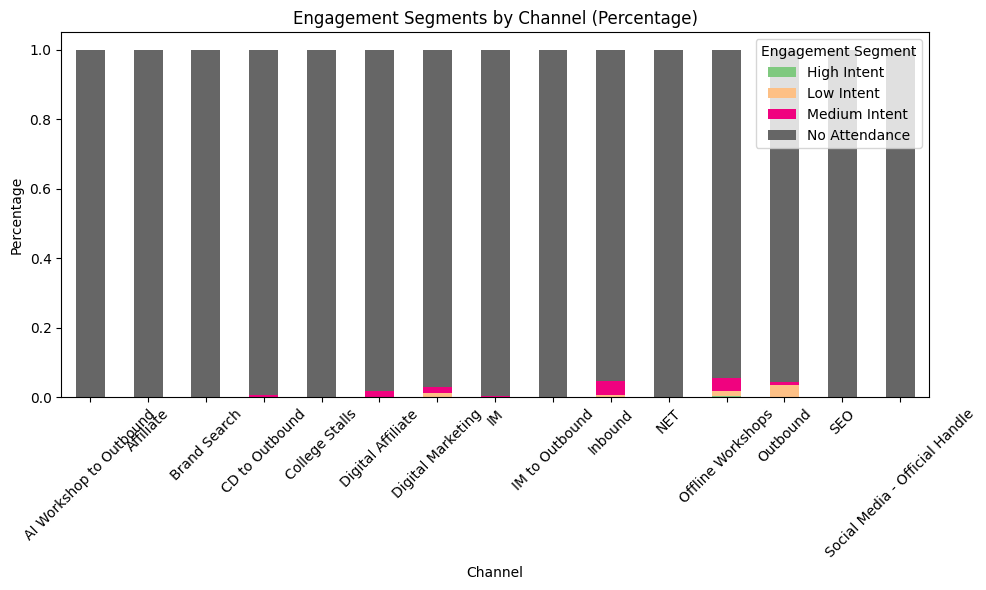

In [68]:
engagement_by_channel_percent = engagement_by_channel.div(engagement_by_channel.sum(axis=1), axis=0)
engagement_by_channel_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title('Engagement Segments by Channel (Percentage)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## # Funnel Drop-offs

In [69]:

funnel_counts = df['Funnel Stage'].value_counts().reset_index()
funnel_counts.columns = ['Funnel Stage', 'Count']
funnel_counts

,Funnel Stage,Count
0,Lead Created,11282
1,Webinar Attended - Not Qualified,191
2,Qualified for Sales,39


#### Result: Most leads are stuck at the "Lead Created" stage, showing a major drop-off before qualification.

C:\Users\Admin\AppData\Local\Temp\ipykernel_21784\1588279123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel_counts, x='Funnel Stage', y='Count', palette='viridis')


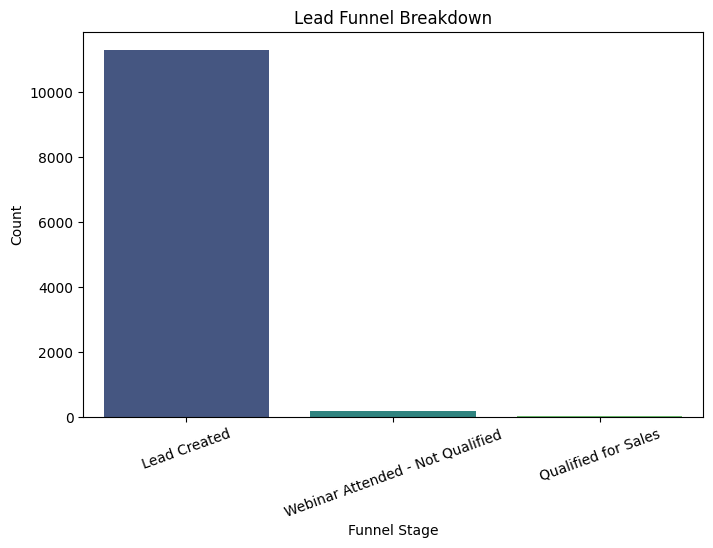

In [70]:
plt.figure(figsize=(8, 5))
sns.barplot(data=funnel_counts, x='Funnel Stage', y='Count', palette='viridis')
plt.title('Lead Funnel Breakdown')
plt.xticks(rotation=20)
plt.show()

## # Qualification by Language

### Telugu,Hindi and Malayalam leads have the highest qualification rate. Tamil has the lowest.

In [71]:

df['is_qualified'] = df['Funnel Stage'] == 'Qualified for Sales'
qualification_by_language = df.groupby('Language')['is_qualified'].mean().reset_index()
qualification_by_language['Qualification Rate (%)'] = qualification_by_language['is_qualified'] * 100
qualification_by_language = qualification_by_language.sort_values(by='Qualification Rate (%)', ascending=False)
qualification_by_language

,Language,is_qualified,Qualification Rate (%)
9,Telugu,0.007059,0.705882
3,Hindi,0.005382,0.538213
5,Malayalam,0.004769,0.476948
4,Kannada,0.001055,0.105485
8,Tamil,0.000944,0.094429
0,Bengali,0.000000,0.000000
1,English,0.000000,0.000000
2,Gujarati,0.000000,0.000000
7,Odia,0.000000,0.000000
6,Marathi,0.000000,0.000000


In [72]:
# Qualification Rate by Top 5 Languages
top_langs = df['Language'].value_counts().nlargest(5).index
top_lang_data = df[df['Language'].isin(top_langs)]
top_lang_qual = top_lang_data.groupby('Language')['is_qualified'].mean().reset_index()
top_lang_qual['Qualification Rate (%)'] = top_lang_qual['is_qualified'] * 100

top_lang_qual


,Language,is_qualified,Qualification Rate (%)
0,Hindi,0.005382,0.538213
1,Kannada,0.001055,0.105485
2,Malayalam,0.004769,0.476948
3,Tamil,0.000944,0.094429
4,Telugu,0.007059,0.705882


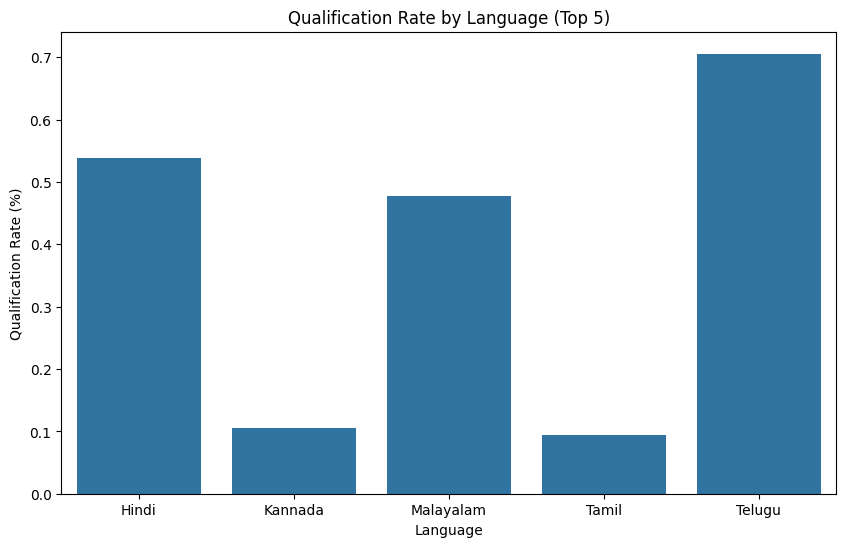

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_lang_qual, x='Language', y='Qualification Rate (%)')
plt.title('Qualification Rate by Language (Top 5)')
plt.ylabel('Qualification Rate (%)')
plt.xlabel('Language')
plt.show()

In [74]:
df.to_excel("Cleaned_lead_flow_Assignment_Data.xlsx", index=False)